<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/SVM_Debtor_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

warnings.filterwarnings("ignore")



In [23]:
# Cargo el dataset
files.upload()

Saving credito.csv to credito (1).csv


{'credito.csv': b'ID,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,Deuda_normal,Deuda_30,Deuda_90,deuda_120,deuda_180,canti_moras,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso\n1,35000.00,35,X,1,1,1,9976.00,170000.00,4,170000.00,0.00,0.00,0.00,0.00,0,F,F,UNIVERSIDAD NACIONAL DE CORDOBA                             ,143,8957.00,12,50000.00,DS_SUCURSAL_ORO,CORDOBA,1\n2,50000.00,24,B,1,3,0,16807.00,236000.00,4,187000.00,0.00,11000.00,0.00,38000.00,0,F,F,POLICIA FEDERAL ARGENTINA                                   ,174,6874.49,9,25000.00,DS_BASICO,BUENOS AIRES,1\n3,50000.00,42,X,1,1,5,42959.00,683343.00,3,683343.00,0.00,0.00,0.00,0.00,0,F,F,MINISTERIO DE EDUCACION                                     ,0,4191.93,12,23400.00,DS_SUCURSAL_ORO,CORDOBA,0\n4,32000.00,21,H,1,1,3,7583.00,76000.00,5,76000.00,0.00,0.00,0.00,0.00,0,F,

In [24]:
credito=pd.read_csv("credito.csv")
print(f"forma:{credito.shape}")
print(f"Columnas:{credito.columns}")
credito

forma:(1190, 26)
Columnas:Index(['ID', 'ingresos', 'edad', 'provincia_codigo', 'bancarizado',
       'BCRA_Peor_Situacion', 'Cantidad_consultas_7_dias',
       'Compromisos_Mensual', 'Endeudamiento_Externo', 'Nivel_Socioeconomico',
       'Deuda_normal', 'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180',
       'canti_moras', 'autonomo', 'Es_jubilado', 'relacion_dependencia',
       'dias_atraso', 'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'PRODUCTO',
       'PROVINCIA', 'moroso'],
      dtype='object')


,ID,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
0,1,35000.0,35,X,1,1,1.0,9976.0,170000.0,4,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
1,2,50000.0,24,B,1,3,0.0,16807.0,236000.0,4,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
2,3,50000.0,42,X,1,1,5.0,42959.0,683343.0,3,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
3,4,32000.0,21,H,1,1,3.0,7583.0,76000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
4,5,50000.0,21,Z,1,1,4.0,1040.0,23000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1186,50000.0,51,Q,0,0,0.0,0.0,0.0,-1,...,0,0,0,0,5557.65,12,32000.0,DS_REFINANCIACION,NEUQUEN,0
1186,1187,46240.0,32,C,1,1,0.0,3010.0,49000.0,3,...,F,F,POLICIA FEDERAL ARGENTINA ...,0,2594.03,6,10000.0,DS_SUCURSAL_ORO,CAPITAL FEDERAL,0
1187,1188,42866.0,21,B,1,1,18.0,3998.0,46000.0,3,...,F,F,SANOFI PASTEUR SA,58,8957.10,12,50000.0,DS_SUCURSAL_ORO,BUENOS AIRES,0
1188,1189,17000.0,38,B,0,0,0.0,0.0,0.0,-1,...,0,0,0,28,7633.03,6,30000.0,DS_REFINANCIACION,BUENOS AIRES,0


In [25]:
# Descripcion del dataset
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1190 non-null   int64  
 1   ingresos                   1190 non-null   float64
 2   edad                       1190 non-null   int64  
 3   provincia_codigo           1190 non-null   object 
 4   bancarizado                1190 non-null   int64  
 5   BCRA_Peor_Situacion        1190 non-null   int64  
 6   Cantidad_consultas_7_dias  1189 non-null   float64
 7   Compromisos_Mensual        1190 non-null   float64
 8   Endeudamiento_Externo      1190 non-null   float64
 9   Nivel_Socioeconomico       1190 non-null   int64  
 10  Deuda_normal               1190 non-null   float64
 11  Deuda_30                   1190 non-null   float64
 12  Deuda_90                   1190 non-null   float64
 13  deuda_120                  1190 non-null   float

In [26]:
credito.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1190.0,595.500000,343.667717,1.0,298.2500,595.50,892.75,1190.00
ingresos,1190.0,53437.669538,43665.378404,12924.0,33539.6175,47000.00,63000.00,930000.00
edad,1190.0,43.843697,13.781331,18.0,33.0000,42.00,53.00,121.00
bancarizado,1190.0,0.642017,0.479609,0.0,0.0000,1.00,1.00,1.00
BCRA_Peor_Situacion,1190.0,0.889076,1.231544,-1.0,0.0000,1.00,1.00,5.00
Cantidad_consultas_7_dias,1189.0,1.879731,2.768540,0.0,0.0000,1.00,3.00,18.00
Compromisos_Mensual,1190.0,9321.036134,14235.963408,0.0,0.0000,3639.00,13106.00,177911.00
Endeudamiento_Externo,1190.0,152621.008403,240678.479013,0.0,0.0000,54011.50,227061.25,3206484.00
Nivel_Socioeconomico,1190.0,2.902521,2.750135,-1.0,-1.0000,4.00,5.00,7.00
Deuda_normal,1190.0,150607.071429,239969.973391,0.0,0.0000,53000.00,223000.00,3206484.00


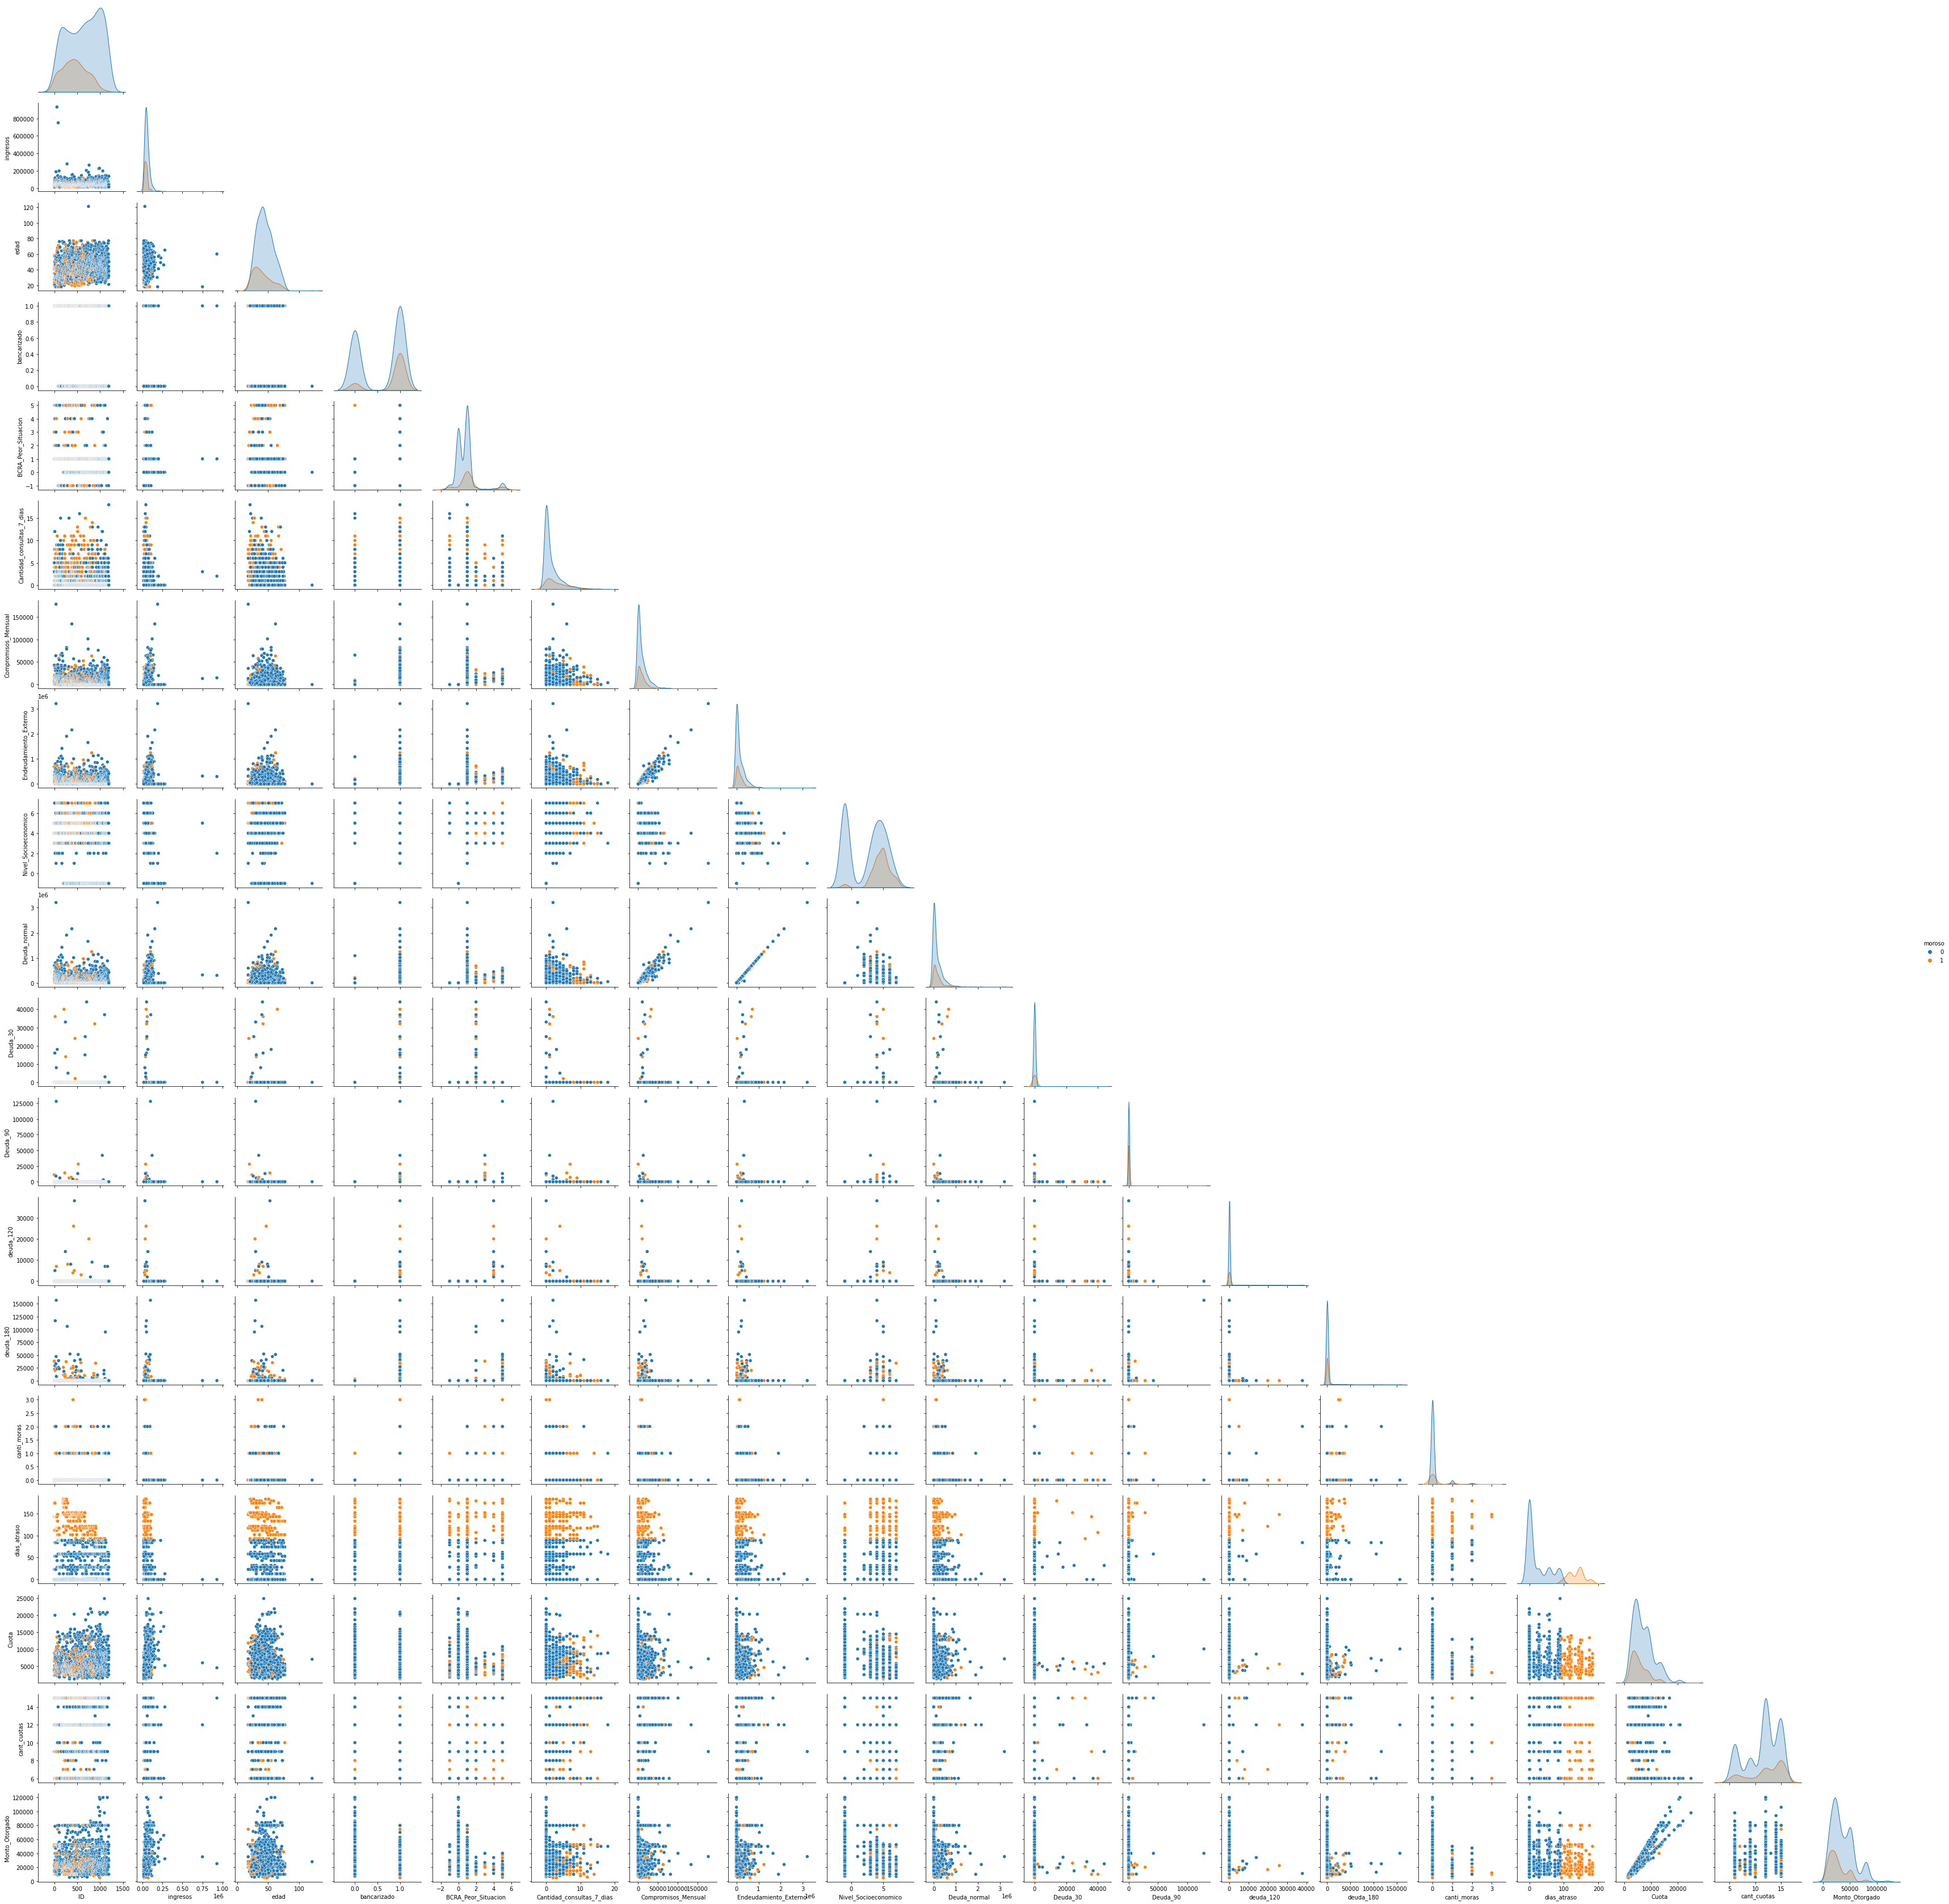

In [27]:
# Veo las relaciones que tiene el dataset
sns.pairplot(credito,hue="moroso",corner=True)

In [28]:
# Veo si hay valores NULL o NaN
print(f"¿tiene datos en null o NaN?\n {credito.isnull().any().any()}")
print("\n")
print(f"¿Que columnas poseen Null o NaN?\n")
print(credito.isnull().any())
print("\n")
print(f"¿Cuantos registros ausentes hay?\n{credito.isnull().sum()}")

¿tiene datos en null o NaN?
 True


¿Que columnas poseen Null o NaN?

ID                           False
ingresos                     False
edad                         False
provincia_codigo             False
bancarizado                  False
BCRA_Peor_Situacion          False
Cantidad_consultas_7_dias     True
Compromisos_Mensual          False
Endeudamiento_Externo        False
Nivel_Socioeconomico         False
Deuda_normal                 False
Deuda_30                     False
Deuda_90                     False
deuda_120                    False
deuda_180                    False
canti_moras                  False
autonomo                     False
Es_jubilado                  False
relacion_dependencia          True
dias_atraso                  False
Cuota                        False
cant_cuotas                  False
Monto_Otorgado               False
PRODUCTO                     False
PROVINCIA                    False
moroso                       False
dtype: bool


¿Cuant

In [29]:
# Determino columna "ID" como indice del DF
credito.set_index(["ID"],inplace=True)
# Tengo dos columnas que describen lo mismo, elimino una
credito.drop(["provincia_codigo"],axis=1,inplace=True)
print(credito.shape)
credito

(1190, 24)


,ingresos,edad,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,Deuda_normal,Deuda_30,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
ID,,,,,,,,,,,,,,,,,,,,,
1,35000.0,35,1,1,1.0,9976.0,170000.0,4,170000.0,0.0,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
2,50000.0,24,1,3,0.0,16807.0,236000.0,4,187000.0,0.0,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
3,50000.0,42,1,1,5.0,42959.0,683343.0,3,683343.0,0.0,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
4,32000.0,21,1,1,3.0,7583.0,76000.0,5,76000.0,0.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
5,50000.0,21,1,1,4.0,1040.0,23000.0,5,23000.0,0.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,50000.0,51,0,0,0.0,0.0,0.0,-1,0.0,0.0,...,0,0,0,0,5557.65,12,32000.0,DS_REFINANCIACION,NEUQUEN,0
1187,46240.0,32,1,1,0.0,3010.0,49000.0,3,49000.0,0.0,...,F,F,POLICIA FEDERAL ARGENTINA ...,0,2594.03,6,10000.0,DS_SUCURSAL_ORO,CAPITAL FEDERAL,0
1188,42866.0,21,1,1,18.0,3998.0,46000.0,3,46000.0,0.0,...,F,F,SANOFI PASTEUR SA,58,8957.10,12,50000.0,DS_SUCURSAL_ORO,BUENOS AIRES,0


In [30]:
# Veo los valores en "Autonomo" y "Es_jubilado" para conocer mas el dataset
print(credito.autonomo.unique())
print(credito.Es_jubilado.unique())

# con esto verifico que hay inconsistencias en estas columnas

['F' '0' 'V']
['F' 'V' '0']


In [31]:
# Soluciono las inconsistencias
credito.autonomo=credito.autonomo.map({"F":0,"V":1})
credito.Es_jubilado=credito.Es_jubilado.map({"F":0,"V":1})
print(credito.autonomo.dtype)
print("\n")
print(credito.Es_jubilado.dtype)
print("\n",credito.autonomo.unique())
print("\n",credito.Es_jubilado.unique())
print("\n")
credito.info()


float64


float64

 [ 0. nan  1.]

 [ 0.  1. nan]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1189 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 

In [32]:
# Supongo como "0" los valores ausentes para las columas, "autonomo","Es_jubilado","relaccion_dependencia"
# Si pudiera hablar con el cliente trataria de rellenar con valores mas representativos
credito.fillna(0,inplace=True)
credito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [33]:
# Reviso los valores en " autonomo","Es_jubilado","relacion_dependencia"
print(credito.autonomo.value_counts())
print(credito.Es_jubilado.value_counts())
print(credito.relacion_dependencia.value_counts())
credito.dtypes

0.0    1189
1.0       1
Name: autonomo, dtype: int64
0.0    1068
1.0     122
Name: Es_jubilado, dtype: int64
0                                                               359
0                                                               138
SUPERIOR GOBIERNO DE LA PCIA DE TUCUMAN                          72
CONTADURIA GENERAL DEL EJERCITO                                  60
PROVINCIA DE SALTA                                               46
                                                               ... 
IPLYC CONFORT CREDITOS Y SERVICIOS SOCIEDAD DEL ESTADO            1
MATERNOS S R L                                                    1
MUNICIPALIDAD DE SAN PATRICIO DEL CHAÃ°AR                         1
HONORABLE CONSEJO DELIBERANTE DE LA CIUDAD DE POSADAS             1
SANOFI PASTEUR SA                                                 1
Name: relacion_dependencia, Length: 199, dtype: int64


ingresos                     float64
edad                           int64
bancarizado                    int64
BCRA_Peor_Situacion            int64
Cantidad_consultas_7_dias    float64
Compromisos_Mensual          float64
Endeudamiento_Externo        float64
Nivel_Socioeconomico           int64
Deuda_normal                 float64
Deuda_30                     float64
Deuda_90                     float64
deuda_120                    float64
deuda_180                    float64
canti_moras                    int64
autonomo                     float64
Es_jubilado                  float64
relacion_dependencia          object
dias_atraso                    int64
Cuota                        float64
cant_cuotas                    int64
Monto_Otorgado               float64
PRODUCTO                      object
PROVINCIA                     object
moroso                         int64
dtype: object

In [34]:
# Quiero saber cuantos valores distintos tiene "relacion_dependencia" (son los nombres de los lugares de trabajo)
print(f"numero de categorias:{ credito.relacion_dependencia.nunique()}")


numero de categorias:199


In [35]:
# Tengo 3 columnas tipo "objet"
# Para "provincia" y "producto" parece adecuado aplicar un Encoder tipo OnehotEncoder
# Pero "relacion_dependencia" describe cada lugar de trabajo. Sin embargo, no parece importante este hecho
# Sino identificar el tipo de actividad de cada cliente
# Entonces aplicare 1 a quienes tienen empleo y 0 al desempleado
# en "BCRA_Peor_Situacion" si tengo categorias, aun que la variable sea entera
# Lo mismo en "Nivel_socioeconomico". Entonces parece razonable codificarlos tipo OneHotEncoder

credito.relacion_dependencia.mask(credito.relacion_dependencia!=0,1,inplace=True)
print(credito.relacion_dependencia.value_counts())
print("BCRA\n",credito.BCRA_Peor_Situacion.value_counts())
print("NivSE\n",credito.Nivel_Socioeconomico.value_counts())
credito.info()

1    1052
0     138
Name: relacion_dependencia, dtype: int64
BCRA
  1    663
 0    359
 5     65
-1     58
 2     21
 4     14
 3     10
Name: BCRA_Peor_Situacion, dtype: int64
NivSE
 -1    359
 5    255
 4    240
 3    141
 6    127
 7     52
 2     13
 1      3
Name: Nivel_Socioeconomico, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal           

In [36]:
# Ahora aplicare el codificado. Pandas tiene un metodo llamado GET_DUMIES que hace lo mismo que OneHot
# sin necesidad de hacer conversiones de matrices de np a df y de vuelta
# Primero hay que cambiar el tipo de las columnas a transformar a "objet" o "category"
columnas_cod=["PRODUCTO","PROVINCIA","BCRA_Peor_Situacion","Nivel_Socioeconomico"]
# Asigno los tipos correctos
credito[columnas_cod]=credito[columnas_cod].astype(str)
credito[["relacion_dependencia","autonomo","Es_jubilado"]]=credito[["relacion_dependencia","autonomo","Es_jubilado"]].astype(int)
credito.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   object 
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   object 
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [37]:
# Ahora a codificar
credito=pd.get_dummies(credito,dtype=int)
credito.info()
credito

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ingresos                       1190 non-null   float64
 1   edad                           1190 non-null   int64  
 2   bancarizado                    1190 non-null   int64  
 3   Cantidad_consultas_7_dias      1190 non-null   float64
 4   Compromisos_Mensual            1190 non-null   float64
 5   Endeudamiento_Externo          1190 non-null   float64
 6   Deuda_normal                   1190 non-null   float64
 7   Deuda_30                       1190 non-null   float64
 8   Deuda_90                       1190 non-null   float64
 9   deuda_120                      1190 non-null   float64
 10  deuda_180                      1190 non-null   float64
 11  canti_moras                    1190 non-null   int64  
 12  autonomo                       1190 non-null   i

,ingresos,edad,bancarizado,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Deuda_normal,Deuda_30,Deuda_90,deuda_120,...,PROVINCIA_NEUQUEN,PROVINCIA_RIO NEGRO,PROVINCIA_SALTA,PROVINCIA_SAN JUAN,PROVINCIA_SAN LUIS,PROVINCIA_SANTA CRUZ,PROVINCIA_SANTA FE,PROVINCIA_SANTIAGO DEL ESTERO,PROVINCIA_TIERRA DEL FUEGO,PROVINCIA_TUCUMAN
ID,,,,,,,,,,,,,,,,,,,,,
1,35000.0,35,1,1.0,9976.0,170000.0,170000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,50000.0,24,1,0.0,16807.0,236000.0,187000.0,0.0,11000.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,42,1,5.0,42959.0,683343.0,683343.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,32000.0,21,1,3.0,7583.0,76000.0,76000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,50000.0,21,1,4.0,1040.0,23000.0,23000.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,50000.0,51,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1187,46240.0,32,1,0.0,3010.0,49000.0,49000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1188,42866.0,21,1,18.0,3998.0,46000.0,46000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


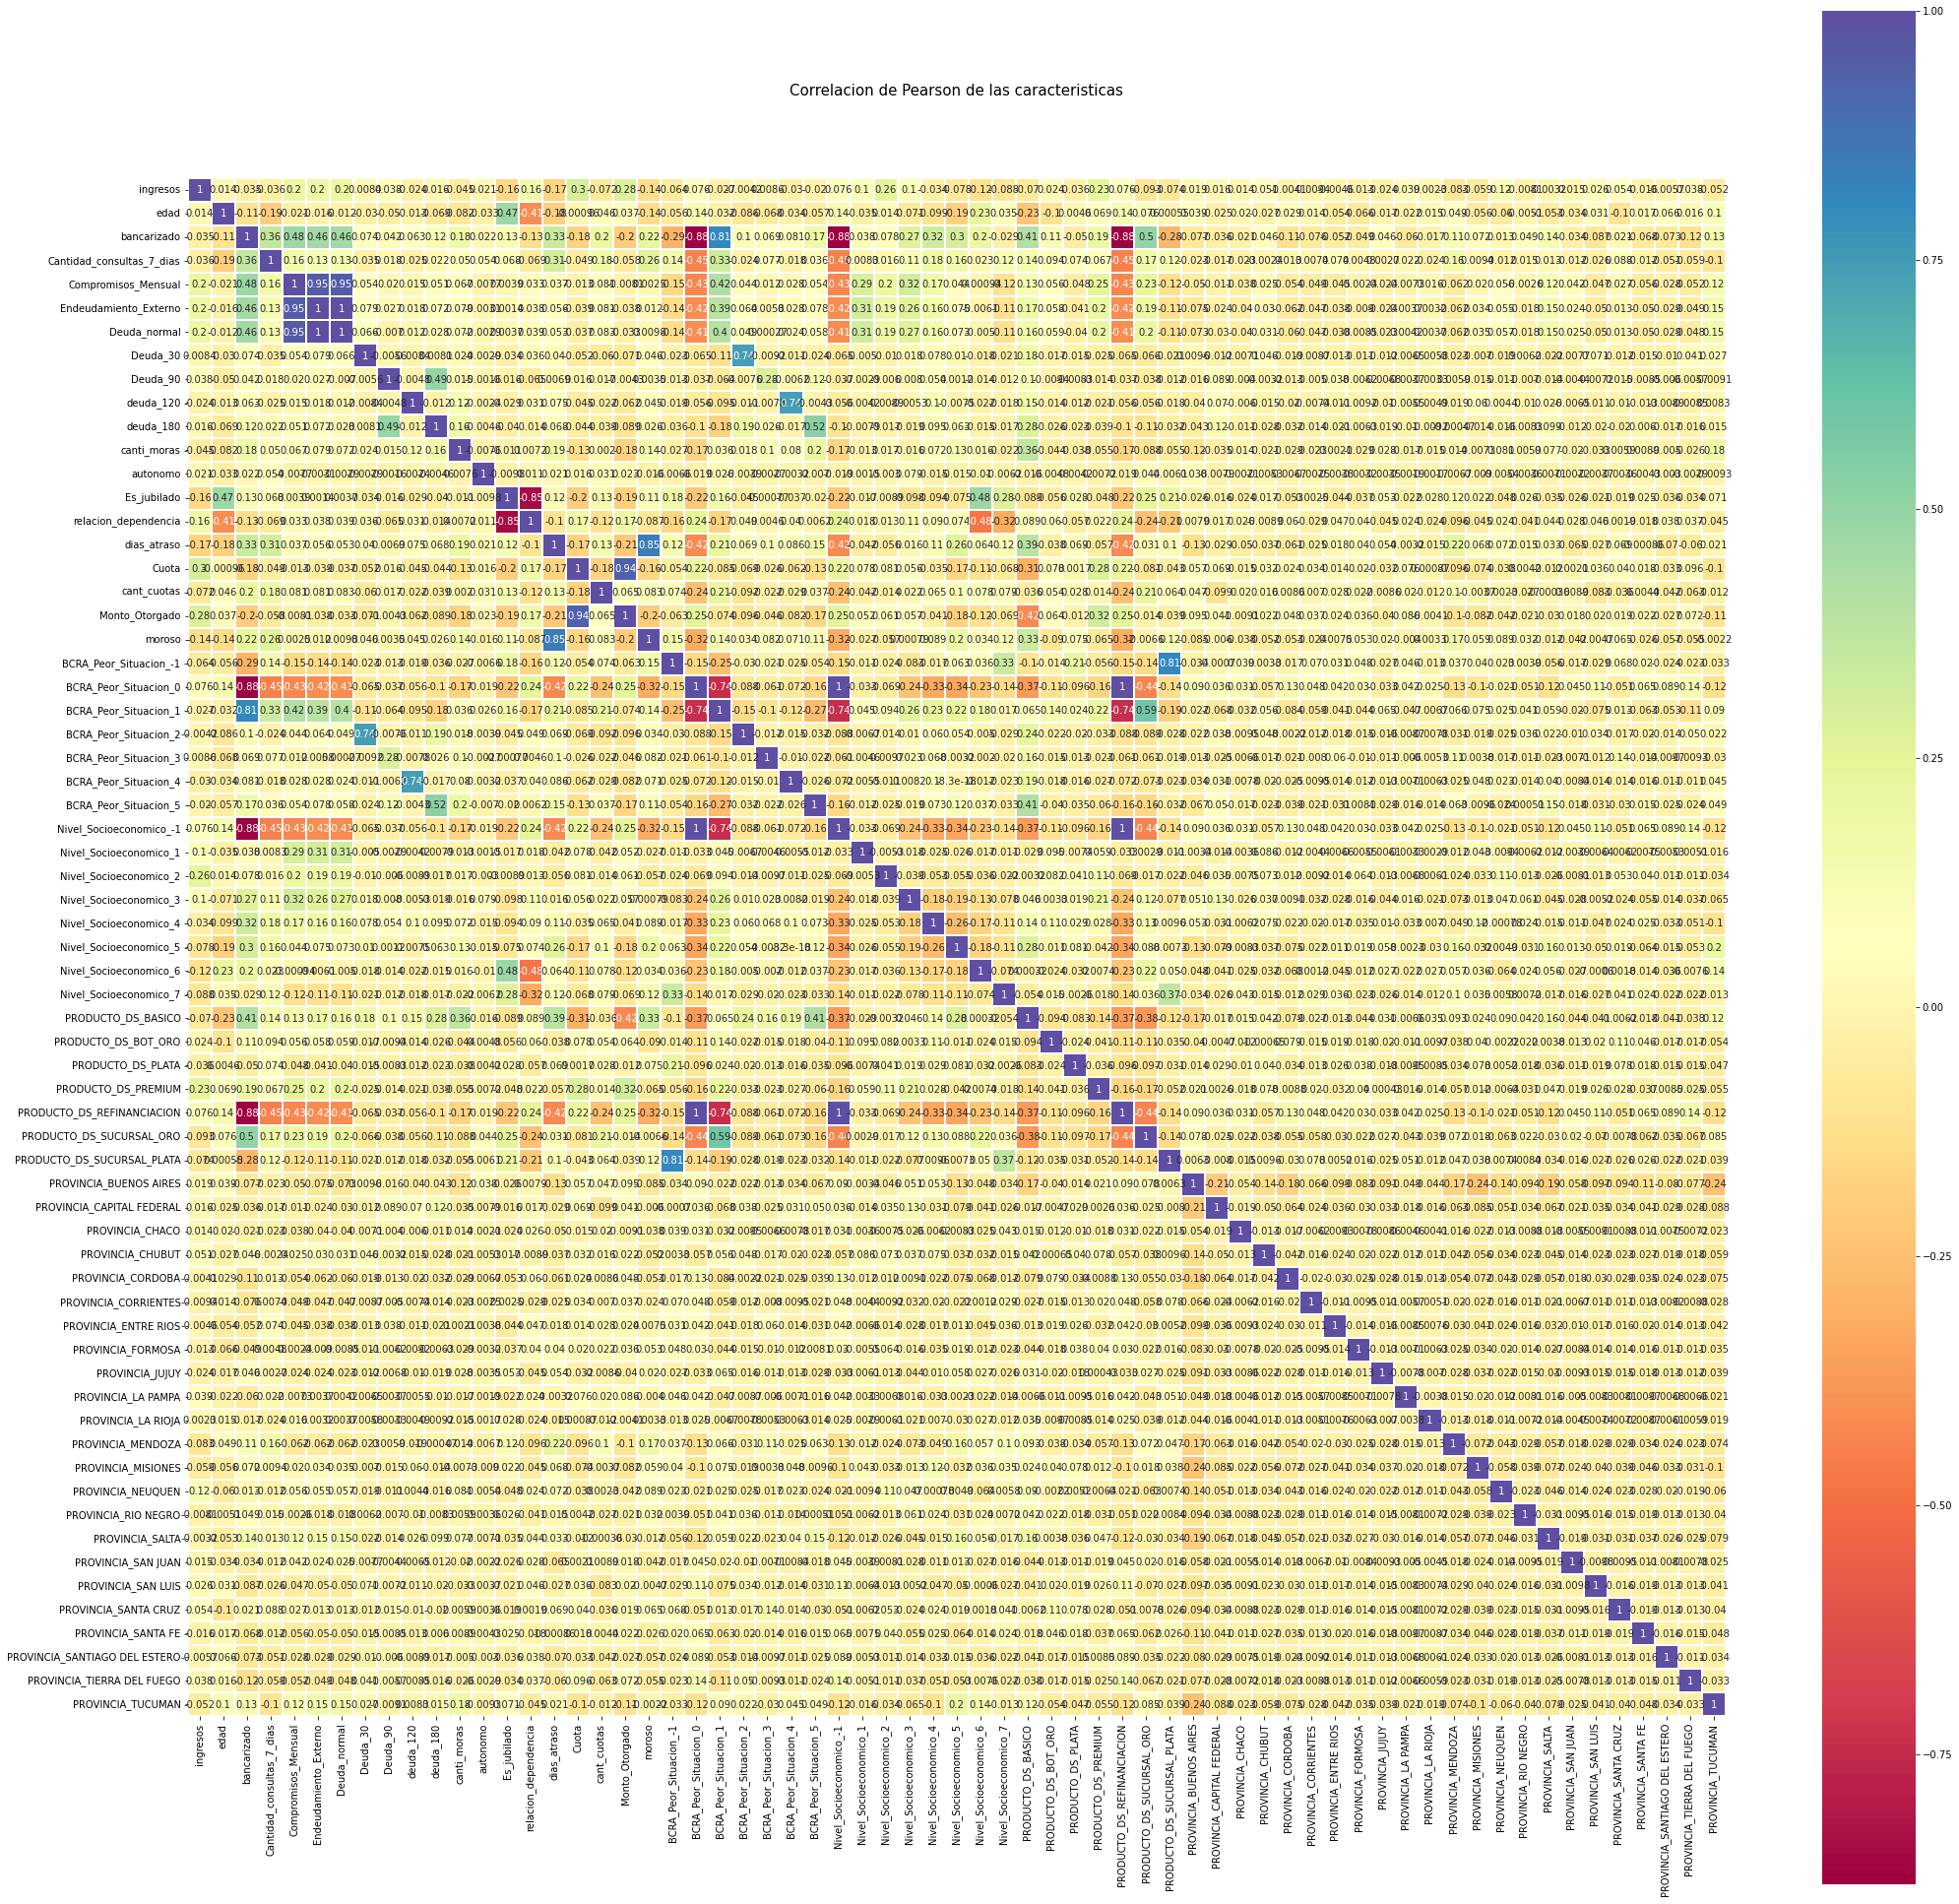

In [38]:
# Veo como quedaron las correlaciones en el Dataset. Uso Pearson
plt.figure(figsize=(35,35))
plt.title("Correlacion de Pearson de las caracteristicas",y=1.05,size=15)
sns.heatmap(credito.corr(),linewidths=0.1,vmax=1.0,square=True,
            cmap="Spectral",linecolor="white",annot=True)
plt.show()



moroso
0    921
1    269
dtype: int64


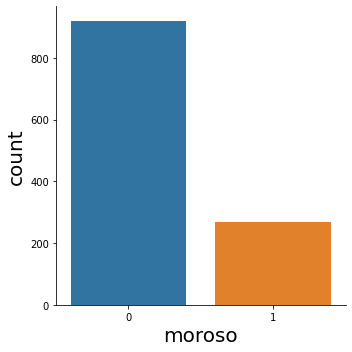

In [40]:
# Veo como estan distribuidas la categoria target "moroso"
parameters={"axes.labelsize":20,"axes.titlesize":20}
plt.rcParams.update(parameters)
print(credito.groupby("moroso").size())
sns.catplot("moroso",data=credito,kind="count")
# Existe desbalance entre ambas caracteristicas


In [46]:
# Ya esta listo el dataset para buscar y entrenar modelos, copio el DF para no perderlo
# Falta estandarizar las caracteristicas
# Usare SVM, con distintos valores de C y gamma, distintos kernel, para encontrar el mejor modelo
# Armare un pipeline, pero primero separamos en train y tes
"........................."

# Empiezo separando en train y test, uso un conjunto de validacion para elegir el modelo
# Usare 2 veces el sklearn.train..
cred=credito.copy()
y=np.array(cred.moroso) # defino variable target
X=np.array(cred.drop(["moroso"],1)) # defino caracteristicas puras
# stratify=y para que respete la distribucion de clases en y para muestrear

X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2,stratify=y,
                            random_state=16)

X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.2,random_state=16,
                                             stratify=y_train1)


In [47]:
X_train.shape

(761, 64)

In [48]:
# ahora busco los parametros para entrenar
# usare GridSearch, que viene con un cross validation incluido
param_range=[0.0001,0.001,0.01,1.0,10.0,100.0,1000.0]
degree_range=[i+1for i in range(5)]
print(degree_range)
param_grid=[{"svc__C":param_range,"svc__kernel":["linear"]},
            {"svc__C":param_range,"svc__gamma":param_range,"svc__kernel":["rbf","poly"],"svc__degree":degree_range}]
svc=SVC(random_state=16)# para que sea reproducible el resultado
pipe_svc=make_pipeline(StandardScaler(),svc)
# 10 fold y todos los procesadores y que use el score de la svm
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=None,cv=10,n_jobs=-1)
gs.fit(X_train,y_train)
print(f"mejor score:{100*gs.best_score_}%")
print(f"mejores parametros:{gs.best_params_}")



[1, 2, 3, 4, 5]
mejor score:97.37012987012987%
mejores parametros:{'svc__C': 1.0, 'svc__kernel': 'linear'}


tn,fp,fn,tp =[148   0   5  38]
Val_accurancy_svm=97.38219895287958%


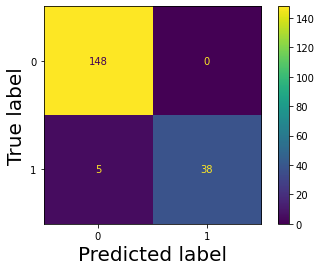

In [49]:
# Veo la matriz de confusion
svm=gs.best_estimator_ # elijo el que mejor salió
svm.fit(X_train,y_train)
y_pred_sv=svm.predict(X_val) # y predigo sobre el conjunto de validación
# Matriz de confusión
print(f"tn,fp,fn,tp ={confusion_matrix(y_val,y_pred_sv).ravel()}")
# queda mejor
conf3 = confusion_matrix(y_val,y_pred_sv)
ConfusionMatrixDisplay(conf3).plot()
print(f"Val_accurancy_svm={100*svm.score(X_val,y_val)}%")


tn, fp, fn, tp =[184   0   2  52]
val_accurancy =99.15966386554622%


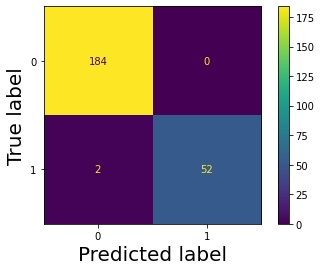

In [51]:
# Ahora termino el trabajo, entrenando el que parece ser el mejor modelo
# de entrenamiento "train1" y luego veamos el rendimiento sobre el conjunto de testeo

svm.fit(X_train1,y_train1)
y_pred1=svm.predict(X_test)
print(f"tn, fp, fn, tp ={confusion_matrix(y_test,y_pred1).ravel()}")

conf_svm=confusion_matrix(y_test,y_pred1)
ConfusionMatrixDisplay(conf_svm).plot()
print(f"val_accurancy ={100*svm.score(X_test,y_test)}%")

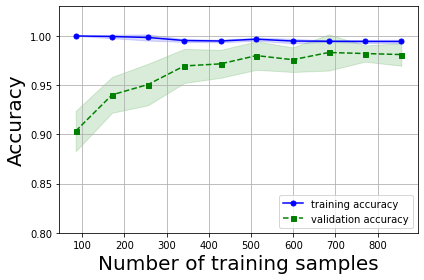

In [52]:
# Veamos la curva de aprendizaje del modelo
train_sizes, train_scores, test_scores = learning_curve(estimator=svm,
                               X=X_train1,
                               y=y_train1,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('image.png', dpi=300)
plt.show()

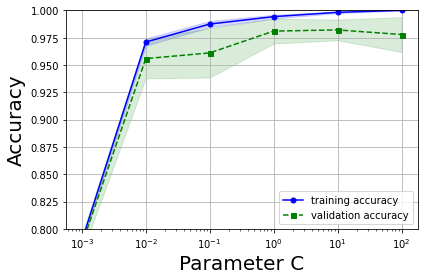

In [53]:
# Analizar si hay sobreajuste o subajuste con curvas de validación 
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=svm, 
                X=X_train1, 
                y=y_train1, 
                param_name='svc__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('image.png', dpi=300)
plt.show()